In [1]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
clf = SVC()

In [3]:
# height, hair length, voice pitch
X = [[180, 15, 0], 
     [167, 42, 1], 
     [136, 35, 1], 
     [174, 15, 0], 
     [141, 28, 1]]

In [4]:
Y = ['Man','Woman','Woman','Man','Woman']

In [5]:
svcClassifier = clf.fit(X,Y)

In [6]:
prediction = svcClassifier.predict([[133,37,1]])

In [7]:
print(prediction)

['Woman']


## MNIST Dataset

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
x, y = load_digits(return_X_y=True)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)

In [11]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]

In [12]:
pipeline = Pipeline(steps)

In [13]:
svcClassifier = pipeline.fit(x_train, y_train)

In [14]:
print(classification_report(y_test,svcClassifier.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        38
           2       1.00      0.97      0.99        39
           3       0.97      1.00      0.99        35
           4       0.91      0.97      0.94        33
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        35
           7       0.95      0.98      0.96        41
           8       1.00      0.97      0.98        29
           9       1.00      0.98      0.99        42

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [15]:
train_acc = float(svcClassifier.score(x_train, y_train)*100)
print("train accuracy score:", train_acc)

test_acc = float(svcClassifier.score(x_test, y_test)*100)
print("test accuracy score:", test_acc)

train accuracy score: 99.58246346555325
test accuracy score: 98.33333333333333


In [16]:
cf_matrix = confusion_matrix(y_test,svcClassifier.predict(x_test))
print(cf_matrix)

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  1  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  1  0  0]
 [ 0  0  0  0  1 36  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 40  0  0]
 [ 0  0  0  1  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0  1  0 41]]


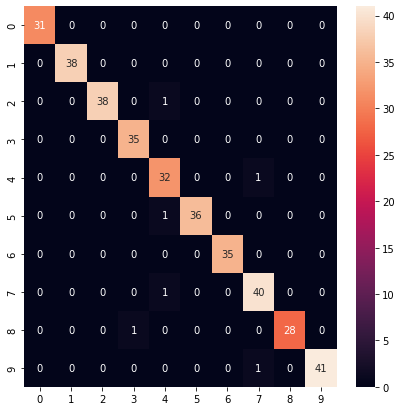

In [17]:
fig = plt.figure(figsize=(7,7), facecolor="white")
cf_matrix = confusion_matrix(y_test,svcClassifier.predict(x_test))
sns.heatmap(cf_matrix, annot=True)
plt.show()